# 단어 빈도를 이용한 벡터화 Bag of Words 구현

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words:", bow)

Bag of Words: {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]
vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray()

print("Bag of Words: ", bow)
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

Bag of Words:  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [4]:
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


# 단어 빈도를 이용한 벡터화 (3) DTM과 코사인 유사도

### DTM의 예시
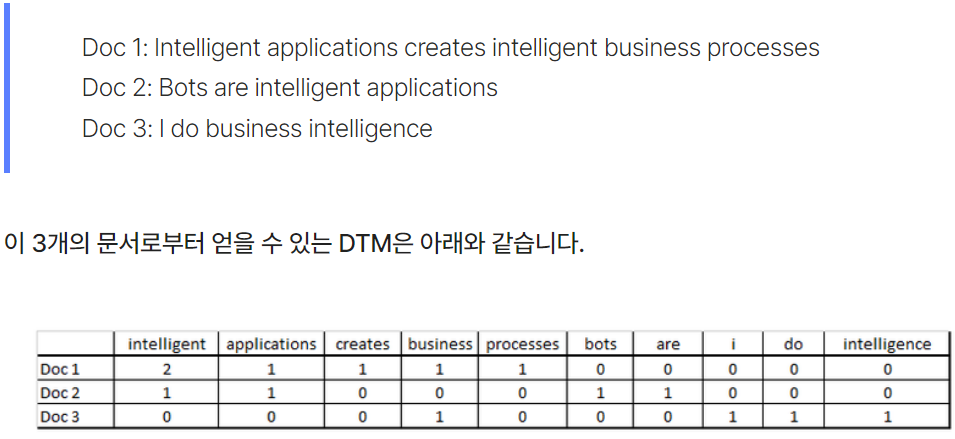
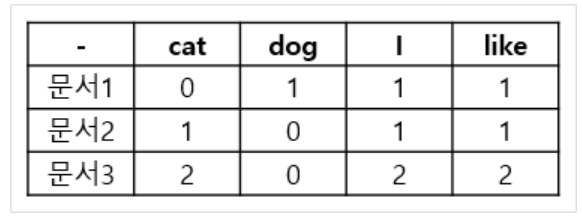

In [5]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [6]:
print('{:.2f}'.format(cos_sim(doc1, doc2))) #문서1과 문서2의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc1, doc3))) #문서1과 문서3의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc2, doc3))) #문서2과 문서3의 코사인 유사도

0.67
0.67
1.00


## 단어 빈도를 이용한 벡터화(scikit-learn Countvectorizer)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print("--------------------------------------------------")
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
--------------------------------------------------
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


## DTM의 한계점
    -1. 문서의 수와 단어의 수가 계속 늘어날수록, 행과 열은 대부분의 값이 0을 가진다는 특징
    (저장 공간 측면에서 낭비(차원의 저주)
    -2. 단어의 빈도에만 집중하는 방법 자체의 한계

# TF-IDF(Term Frequency_Inverse Document Frequency)
   : TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는것

## TF-IDF 계산식
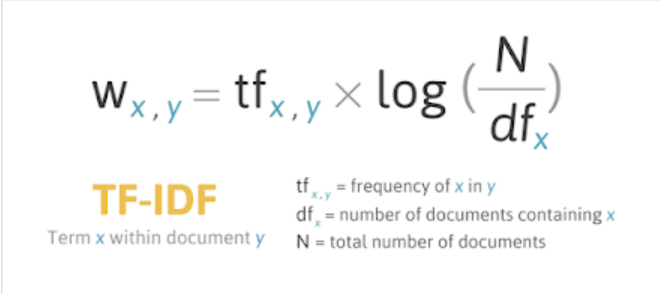

## TF-IDF 구현하기

In [8]:
from math import log
import pandas as pd

In [9]:
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

In [10]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

In [11]:
N = len(docs) # 총 문서의 수
N

3

In [12]:
def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1)) + 1

def tfidf(t, d):
    return tf(t,d)*idf(t)

In [13]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [14]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


In [15]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


# scikit-learn TFidVectorizer 활용

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


## LSA와 LDA
    - DTM과 TF-IDF 행렬같이 Bag of Words를 기반으로 한 표현 방법은 근본적으로 단어의 의미를 벡터로 표현하지 못한다.

## LSA(Latent Semantic Analysis)
    - 잠재의미분석이라고 불리는 전체 코퍼스에서 문서 속 단어들 사이의 관계를 찾아내는 자연어 처리 정보 검색 기술 
    - 장점: 단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수를 찾아 낼 수 있음

# 특잇값 분해
    - LSA를 이해하려면 먼저 선형대수학의 특잇값 분해에 대해 이해가 필요
    - 고유값: 선형방정식 시스템과 관련된 특별한 스칼라 집합
    - 고유벡터: 선형 변환이 적용될 때 방향이 변하지 않는 벡터(0이 아님)입니다.
    고유값이 다른 고유벡터들은 선형 독립적이다.
    특이 행렬은 0을 고유값으로 가진다.
    A가 정방행렬일때, 람다=0은 A의 고유값이 아니다.
    - 특잇값 분해(Singular Value Decomposition ,SVD): MXN 크기의 임의의 사각 행렬 A를 위의 그림의 

## 특잇값 분해의 목적
    - 1. 행렬의 크기를 감소시킨다.
    - 2. 정방행렬이 아닌 행렬의 해를 구할 수 있게 해준다.
    - 3. 데이터 측면에서 데이터의 크기를 줄여준다.